In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
only_zeros = X_train[y_train ==0]

In [5]:
only_zeros.shape

(5923, 28, 28)

In [6]:
only_zeros[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         28, 195, 254, 254, 254, 254, 254, 255,  61,   0,   0,   0,   0,
          0,   0],
       [  

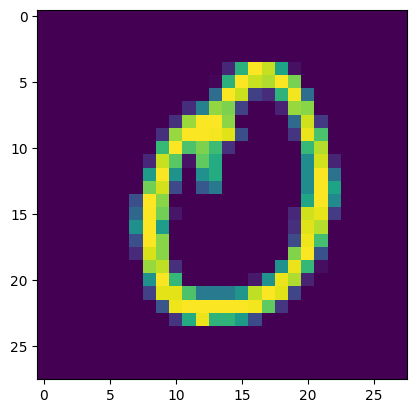

In [7]:
plt.imshow(only_zeros[15])

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential

In [9]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape = [28,28]))
discriminator.add(Dense(150,activation = 'relu'))
discriminator.add(Dense(100,activation = 'relu'))
# FINAL OUTPUT LAYER
discriminator.add(Dense(1,activation = 'sigmoid'))

discriminator.compile(loss = 'binary_crossentropy', optimizer = 'adam')

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-11-16 11:43:35.089001: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-16 11:43:35.089242: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
codings_size = 100

generator = Sequential()
generator.add(Dense(100,activation = 'relu', input_shape = [codings_size]))
generator.add(Dense(150,activation = 'relu'))
generator.add(Dense(784,activation = 'relu'))
generator.add(Reshape([28,28]))

In [11]:
GAN = Sequential([generator,discriminator])

In [12]:
discriminator.trainable = False

In [13]:
GAN.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [14]:
batch_size = 32

In [20]:
my_data.shape

(5923, 28, 28)

In [21]:
5923/32

185.09375

In [16]:
#my_data = X_train

my_data = only_zeros

In [26]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size =100)

In [27]:
dataset

<ShuffleDataset element_spec=TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None)>

In [28]:
dataset = dataset.batch(batch_size,drop_remainder = True).prefetch(1)

In [29]:
eopchs = 1

In [32]:
GAN

In [33]:
GAN.layers[0].summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 150)               15150     
                                                                 
 dense_5 (Dense)             (None, 784)               118384    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [34]:
generator,discriminator = GAN.layers


for epoch in range(eopchs):

    print(f"Currently on Epoch {epoch + 1}")
    i=0  # counter

    for X_batch in dataset:

        i = i+1

        if i%100==0:
            print(f"\t Currently on batch number {i} of {len(my_data)//batch_size} ")

        # DISCRIMINATOR TRAINING PHASE

        noise = tf.random.normal(shape=[batch_size,codings_size])

        gen_images = generator(noise)

        X_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0)

        y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)

        discriminator.trainable = True

        discriminator.train_on_batch(X_fake_vs_real,y1)

        #Train Generator

        noise = tf.random.normal(shape = [batch_size,codings_size])
        y2 = tf.constant([[1.0]]*batch_size)

        discriminator.trainable = False
        GAN.train_on_batch(noise,y2) 

Currently on Epoch 1


2022-11-16 19:06:58.850255: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-16 19:06:58.851517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-16 19:06:59.509297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


	 Currently on batch number 100 of 185 


In [35]:
noise = tf.random.normal(shape = [10,codings_size])

In [36]:
noise.shape

TensorShape([10, 100])

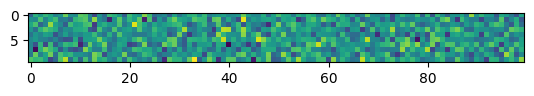

In [37]:
plt.imshow(noise)

In [38]:
images = generator(noise)

In [39]:
images.shape

TensorShape([10, 28, 28])

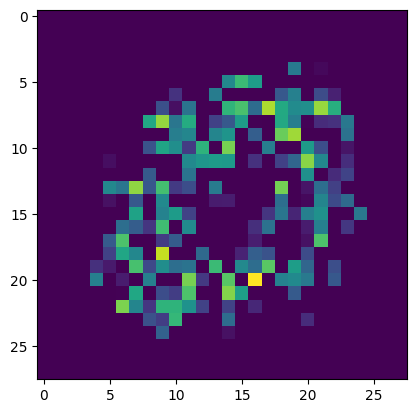

In [40]:
plt.imshow(images[0])

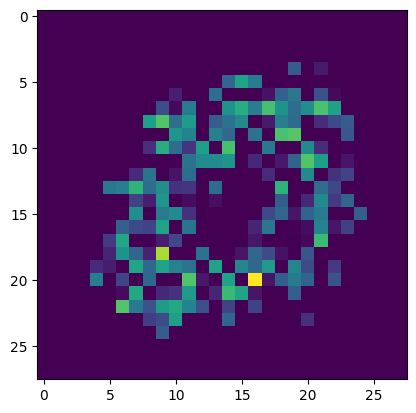

In [41]:
plt.imshow(images[1])